# 6 Problemset 

**Instructions:** Fill in the missing code, which is marked by `# TODO`. Preferably run this notebook on a GPU. On Google Colab, you can do this by selecting Runtime > Change Runtime Type > Hardware Acceleration > GPU. Start by loading the necessary libraries as follows:



In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## 6.4 Random overparameterized networks

Exlain what the following code does:

*   What does the plot show?
*   How does the initialization of the network parameters depend on the number $N$ of neurons?
*   What is the distribution of `model.predict([x])` for large $N$?

32/32 [==============================] - 0s 1ms/step


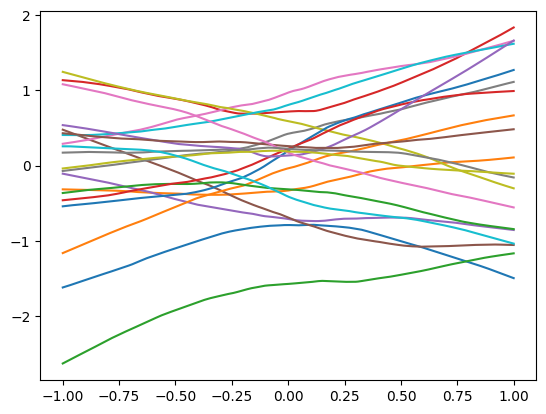

In [4]:
N=1000
fig, ax = plt.subplots()
for i in range(20):
  model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])
  ax.plot(np.linspace(-1, 1, 1000), model.predict(np.linspace(-1, 1, 1000)))
  #ax.plot(0, model.predict(0))

1. The plot shows 20 trials on random prediction model on input space [-1, 1]
2. The first layer consists of N neurons randomly initialized normally with standard deviation as 1, then the second layer computes the mean


## 6.5 Gradient flow of overparameterized networks

Explain what the following code does:

*   What does the plot show?
*   The class `SaveWeights` saves the network weights during training. How does this work? 
*   Investigate the dependence on the number $N$ of hidden neurons: how many epochs do you need to get convergence to a (hopefully) nice interpolant of the data points?


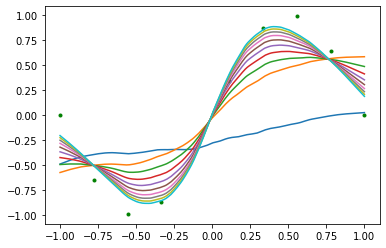

In [ ]:
N=1000
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1)),
    tf.keras.layers.Dense(N, activation='relu', bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1.)),
    tf.keras.layers.Dense(1, bias_initializer=tf.keras.initializers.RandomNormal(stddev=0.5), kernel_initializer=tf.keras.initializers.RandomNormal(stddev = 1./np.sqrt(N)))
  ])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss=tf.keras.losses.MeanSquaredError())

x_train = np.linspace(-1, 1, 10)
y_train = np.sin(np.pi*x_train)
data_train = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(10)

class SaveWeights(tf.keras.callbacks.Callback):
  def __init__(self, interval=1):
    super(SaveWeights, self).__init__()
    self.interval = interval
    self.weights = []

  def on_epoch_end(self, epoch, logs=None):
    if epoch % self.interval == 1:
      self.weights.append(self.model.get_weights())

callback = SaveWeights(interval=100)

history = model.fit(data_train, epochs=1000, verbose=0, callbacks=[callback])

fig, ax = plt.subplots()
ax.plot(x_train, y_train, '.g')
for weights in callback.weights:
  model.set_weights(weights)
  ax.plot(np.linspace(-1, 1, 1000), model.predict(np.linspace(-1, 1, 1000)))

## 6.6 Expected risk of overparameterized networks

For the learning task in 6.5, 

*   Create a test dataset
*   Plot the training loss and test loss of the trained network as a function over the number $N$ of hidden neurons.
*   What's a good choice of $N$? What does the theory say, and what do you see in practice?